In [1]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import os
os.getcwd()

'/gdrive'

In [4]:
os.chdir("MyDrive/Autism_code")
!pwd

/gdrive/MyDrive/Autism_code


In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_excel("Kinematics_autism.xlsx")

In [ ]:
#df=df.fillna(df.mean())

In [8]:
result = df.iloc[:, 3:36]
result

Hip Angle_X_HS  Hip Angle_X_MAX_ST  Hip Angle_X_MAX_ST_time  \
0           29.425              29.273                  1.28210   
1           35.083              35.744                  6.32910   
2           37.093              38.020                  0.69444   
3           37.516              38.203                  0.72993   
4           43.294              42.804                  4.81930   
..             ...                 ...                      ...   
75          36.298              36.177                  5.10200   
76          38.451              39.289                  1.08700   
77          38.307              41.098                  4.44440   
78          34.552              43.506                 85.39300   
79          35.648              34.676                  1.13640   

    Hip Angle_X_MAX_SW  Hip Angle_X_MAX_SW_time  Hip Angle_X_MIN_ST  \
0               32.156                   91.026            -8.85730   
1               37.724                   92.405            -5.96120   
2               43.751                   85.417            12.69700   
3               41.478                   87.591             9.88880   
4               53.676                   85.542            -4.31800   
..                 ...                      ...                 ...   
75              36.778                  100.000             1.57110   
76              39.541                   88.043             0.82095   
77              36.742                   87.778             0.62601   
78              40.844                   91.011             0.33601   
79              42.110                   86.364            -1.86810   

    Hip Angle_X_MIN_ST_time  Hip Angle_X_MIN_SW  Hip Angle_X_MIN_SW_time  \
0                    48.718            -3.21980                   57.692   
1                    51.899            -0.73328                   59.494   
2                    56.250            19.84100                   64.583   
3                    58.394            17.21400                   66.423   
4                    51.807             2.27400                   59.036   
..                      ...                 ...                      ...   
75                   51.020             9.61830                   61.224   
76                   51.087             8.22530                   59.783   
77                   52.222             9.65190                   62.222   
78                   49.438            34.41300                  100.000   
79                   50.000             6.16120                   59.091   

    Hip Angle_X_ROM  ...  Hip Angle_Z_MAX_ST  Hip Angle_Z_MAX_ST_time  \
0            41.014  ...             6.22110                 11.53800   
1            43.685  ...            15.67500                 51.89900   
2            31.054  ...            -9.88630                  0.69444   
3            31.589  ...           -14.77800                  8.75910   
4            57.994  ...             1.56330                 42.16900   
..              ...  ...                 ...                      ...   
75           35.207  ...             0.79369                 43.87800   
76           38.720  ...             5.62210                 48.91300   
77           40.472  ...             5.01580                 48.88900   
78           43.170  ...            11.73000                 30.33700   
79           43.979  ...            16.31100                 12.50000   

    Hip Angle_Z_MAX_SW  Hip Angle_Z_MAX_SW_time  Hip Angle_Z_MIN_ST  \
0               2.7699                   82.051             -8.2079   
1              13.3430                   69.620              1.7928   
2              -9.5818                   83.333            -23.7860   
3              -8.8865                   82.482            -24.3720   
4               3.9507                   93.976             -7.4950   
..                 ...                      ...                 ...   
75             -3.2591                   79.592            

In [10]:
y=df.iloc[:,1]
y

0      Autism
1      Autism
2      Autism
3      Autism
4      Autism
       ...   
75    Control
76    Control
77    Control
78    Control
79    Control
Name: Group, Length: 80, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print("y.shape = ", y.shape)
print(type(y))
print(y)

y.shape =  (80,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cols=result.columns
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(result), columns=cols)

In [14]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

In [24]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', verbose=False, C=90)

In [16]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 44.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [25]:
# Define the Sequential Feature Selection class
# Below is the code for applying Forward Feature Selection
# Forward SFS
# Backward SFS
# Bi-Directional SFS
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator=svm, 
            k_features=(1, 15),
            forward=True, floating=False,
            verbose=2,
            scoring=('accuracy'),
            cv=loocv,
            n_jobs=-1)

In [26]:
from sklearn.svm import SVC
svm_classifier = SVC()

# # Define the Hyper-Parameters on which GridSearch needs to be done
# C = [1.0, 1.5, 2.0, 2.5, 3.0]
# kernel = ['poly', 'rbf', 'sigmoid']
# degree = [2,3,4,5]
# tol = [1e-2, 1e-3, 1e-4, 1e-5]

# param_grid = dict(C=C, kernel=kernel, degree=degree, tol=tol)

param_grid = [
              {'C': [0.001, 0.2, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 5, 8, 90], 
               #'gamma': ['scale', 'auto', 0.01, 0.03, 0.04, 0.043, 0.045, 0.048, 0.05, 0.053, 0.055, 0.058, 0.06, 0.08, 0.0001, 0.001, 0.1, 1, 10], 
               'tol':[1e-2, 1e-3, 1e-4, 1e-5], 
               'kernel': ['linear']
              }#linearSVM
]

In [27]:
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(estimator=svm, 
                          param_grid=param_grid, 
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=loocv, # uses Leave One Out CV
                          refit=True, verbose=1)

In [28]:
algorith_you_are_using = 'Linear SVM' 

In [29]:
segments = {
    'Kinematics_Hip' : result
#     'Cal_Met_Angle' : df.loc[:, 'Cal_Met_Angle_X_HS' : 'Cal_Met_Angle_Z_MIN_time'],
#     'Cal_Mid_Angle' : df.loc[:, 'Cal_Mid_Angle_X_HS' : 'Cal_Mid_Angle_Z_MIN_time'],
#     'Mid_Met_Angle' : df.loc[:, 'Mid_Met_Angle_X_HS' : 'Mid_Met_Angle_Z_MIN_time'],
#     'Sha_Cal_Angle' : df.loc[:, 'Sha_Cal_Angle_X_HS' : 'Sha_Cal_Angle_Z_MIN_time'],
#     'Sha_Foot_Angle' : df.loc[:, 'Sha_Foot_Angle_X_HS' : 'Sha_Foot_Angle_Z_MIN_time']
}

In [23]:
'''svm = SVC(kernel='linear', verbose=False, C=60)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Kinematics_Hip
X.shape =  (80, 33)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    3.0s finished

[2022-08-24 16:59:47] Features: 1/33 -- score: 0.6625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    3.6s finished

[2022-08-24 16:59:51] Features: 2/33 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    4.3s finished

[2022-08-24 16:59:55] Features: 3/33 -- score: 0.6375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.0s finished

[2022-08-24 17:00:01] Features: 4/33 -- score: 0.625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    9.9s finished

[2022-08-24 17:00:11] Features: 5/33 -- score: 0.63

[After SFS] X.shape =  (80, 9)
Fitting 80 folds for each of 52 candidates, totalling 4160 fits
best_classifier =  SVC(C=1.5, kernel='linear', tol=0.01)
Linear SVM, Kinematics_Hip, 0.675, 0.526, 0.810, 0.714, 0.654, 1.709, 0.723, 0.352

##############################################################


In [30]:
'''svm = SVC(kernel='linear', verbose=False, C=90)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Kinematics_Hip
X.shape =  (80, 33)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  33 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    2.4s finished

[2022-08-24 17:18:29] Features: 1/33 -- score: 0.6625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    4.3s finished

[2022-08-24 17:18:33] Features: 2/33 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    9.4s finished

[2022-08-24 17:18:43] Features: 3/33 -- score: 0.6375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.6s finished

[2022-08-24 17:18:50] Features: 4/33 -- score: 0.625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29

[After SFS] X.shape =  (80, 22)
Fitting 80 folds for each of 52 candidates, totalling 4160 fits
best_classifier =  SVC(C=90, kernel='linear')
Linear SVM, Kinematics_Hip, 0.713, 0.658, 0.762, 0.714, 0.711, 2.227, 0.736, 0.423

##############################################################


In [31]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

X = result.values
X = sc.fit_transform(X) # Standard Scaler

print("X.shape = ", X.shape)
print("y.shape = ", y.shape)

X.shape =  (80, 33)
y.shape =  (80,)


In [32]:
# define the classifier
svm = SVC(kernel='linear', verbose=False, C=90,probability=True)

# fit the classifier
# svm.fit(x_train, y_train)

In [33]:
y_true_list, y_pred_list = [], []
for train_idx, test_idx in loocv.split(X, y):
    x_train, y_train = X[train_idx], y[train_idx]
    x_test, y_test = X[test_idx], y[test_idx]
    
    svm.fit(x_train, y_train)
    
    y_pred = svm.predict(x_test)

    y_true_list.append(y_test[:])
    y_pred_list.append(y_pred[:])

print("{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(
                                                                                        accuracy_score(y_true_list, y_pred_list),
                                                                                        get_specificity(y_true_list, y_pred_list),
                                                                                        get_sensitivity(y_true_list, y_pred_list),
                                                                                        get_NPV(y_true_list, y_pred_list),
                                                                                        get_PPV(y_true_list, y_pred_list),
                                                                                        get_PLR(y_true_list, y_pred_list),
                                                                                        f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                        get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                        ))

0.438, 0.395, 0.476, 0.405, 0.465, 0.787, 0.471, -0.129



In [34]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (56, 33)
x_test.shape =  (24, 33)
y_train.shape =  (56,)
y_test.shape =  (24,)


In [35]:
svm.score(x_test, y_test)

0.7916666666666666

In [36]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 41.4 MB/s 


In [37]:
import shap

  0%|          | 0/24 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

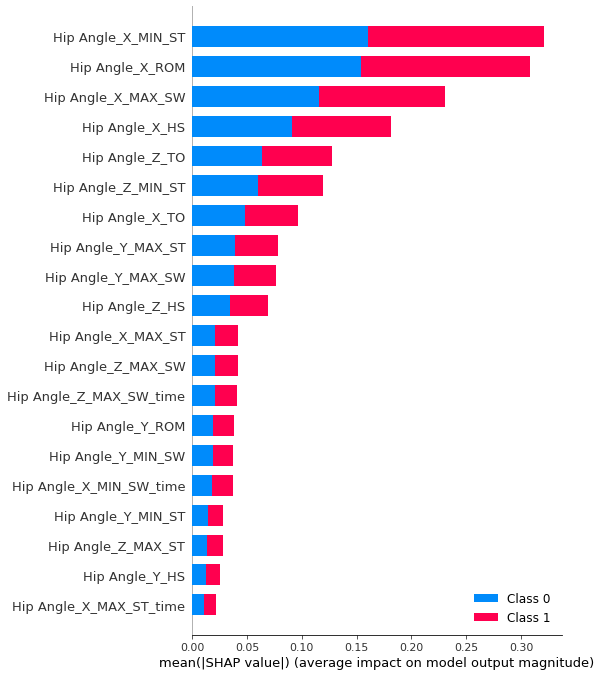

In [38]:
explainer = shap.KernelExplainer(model=svm.predict_proba,data=x_train,link="logit")
shap_values = explainer.shap_values(x_test) 
shap.summary_plot(shap_values, x_train, feature_names=result.columns, plot_type="bar")